# 4. Data Cleaning

In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('../data/youtube_sentiment_results.csv')    

In [3]:
df = df[["comment","label"]]

In [4]:
df = df.reset_index()
df.rename(columns={'index': 'id'}, inplace=True)
df

,id,comment,label
0,0,Sponsored by dbrand. Skin your Galaxy Fold7 (o...,others
1,1,Finally a review of the zfold 7 from an actual...,others
2,2,omg the script next to the selfie video... tha...,others
3,3,I've said this before and I'll say it again. M...,others
4,4,my man starts the video with a shot at a beaut...,others
...,...,...,...
1452,1452,Great Review Thanks.,others
1453,1453,Where can I find the background image? It look...,others
1454,1454,I have a 16 plus and I’m trying to decide whet...,design
1455,1455,The ultra wide lens also doubles as a macro le...,camera


In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["label_encoded"] = label_encoder.fit_transform(df["label"])

label_mapping = pd.DataFrame({
    "label": label_encoder.classes_,
    "encoded_value": range(len(label_encoder.classes_))
})

label_mapping

,label,encoded_value
0,battery,0
1,camera,1
2,design,2
3,others,3
4,performance,4
5,price,5


In [6]:
print(df['label'].value_counts())
print(df['label_encoded'].value_counts())

label
others         927
design         162
camera         123
battery        117
price           66
performance     62
Name: count, dtype: int64
label_encoded
3    927
2    162
1    123
0    117
5     66
4     62
Name: count, dtype: int64


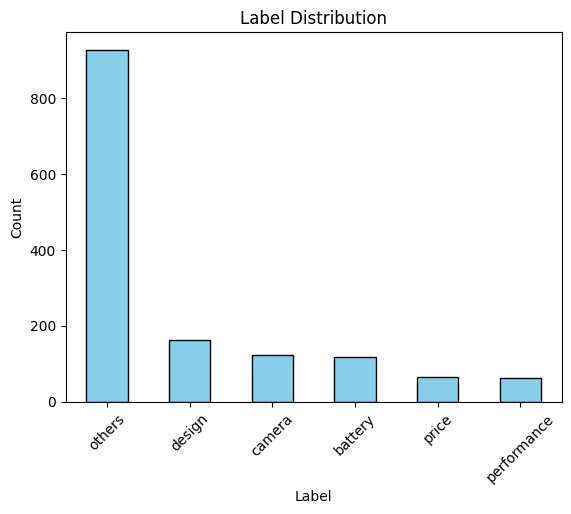

In [7]:
import matplotlib.pyplot as plt

df['label'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [8]:
df.to_csv('../data/cleaned.csv', index=False)